## Todo 
- linear regression using diamond dataset

In [61]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.carat.corr(df.price)

0.9215913011934771

In [4]:
df.depth.corr(df.price)

-0.010647404584142966

<AxesSubplot:xlabel='carat', ylabel='price'>

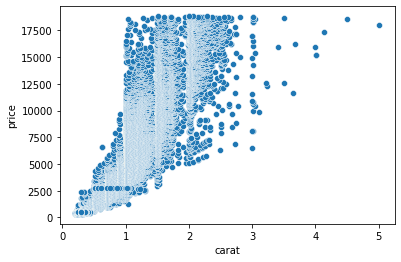

In [5]:
sns.scatterplot(x='carat',y='price', data=df)

<AxesSubplot:xlabel='depth', ylabel='price'>

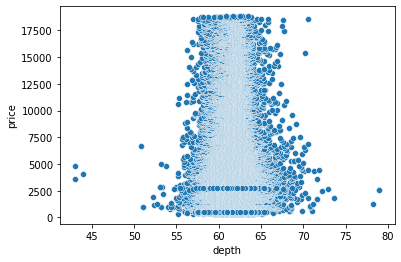

In [6]:
sns.scatterplot(x='depth',y='price', data=df)

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.sort_values(['carat'], ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
...,...,...,...,...,...,...,...,...,...,...
31592,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
31591,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
31601,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [9]:
df.z.corr(df.price)

0.8612494438514485

In [10]:
df.groupby('cut')[['price']].mean().sort_values('price')

,price
cut,
Ideal,3457.541970
Good,3928.864452
Very Good,3981.759891
Fair,4358.757764
Premium,4584.257704


In [11]:
df.groupby('cut')[['price']].median().sort_values('price')

,price
cut,
Ideal,1810.0
Very Good,2648.0
Good,3050.5
Premium,3185.0
Fair,3282.0


In [12]:
df.groupby('clarity')[['price']].median().sort_values('price')

,price
clarity,
IF,1080
VVS1,1093
VVS2,1311
VS1,2005
VS2,2054
SI1,2822
I1,3344
SI2,4072


In [13]:
df.groupby('color')[['price']].median().sort_values('price')

,price
color,
E,1739.0
D,1838.0
G,2242.0
F,2343.5
H,3460.0
I,3730.0
J,4234.0


In [14]:
## Brute force approch
df.shape

(53940, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [16]:
df.isnull().sum().sum()

0

In [17]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


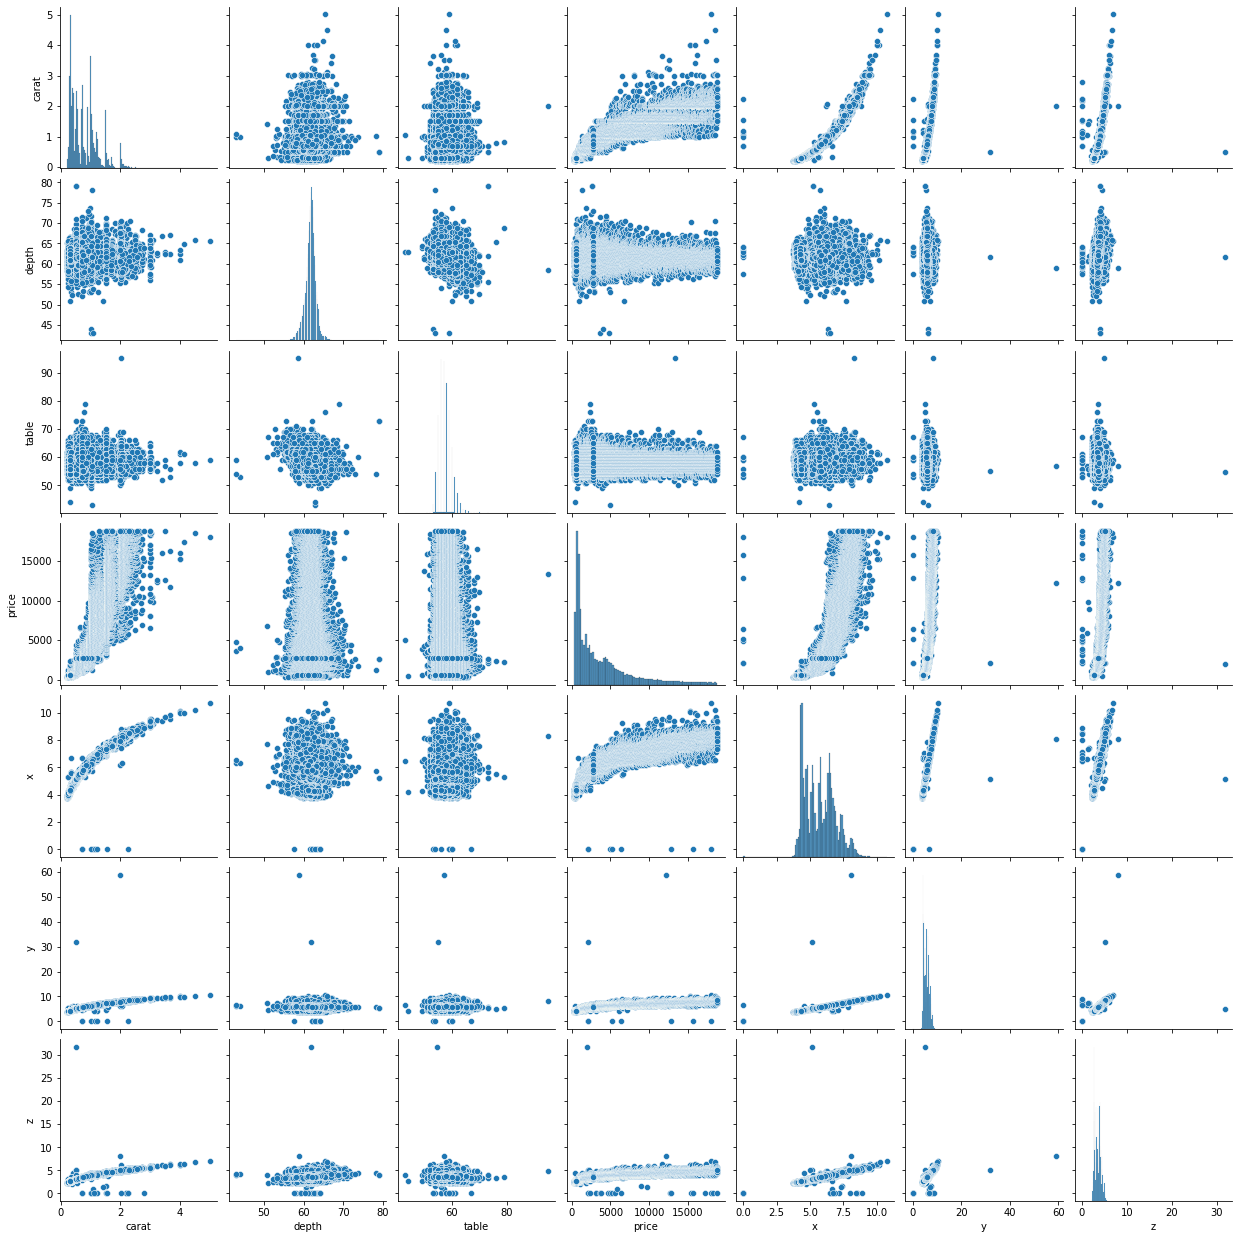

In [19]:
sns.pairplot(df)

In [20]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [21]:
df['cut'] = preprocessing.LabelEncoder().fit_transform(df['cut'])
df['color'] = preprocessing.LabelEncoder().fit_transform(df['color'])
df['clarity'] = preprocessing.LabelEncoder().fit_transform(df['clarity'])

In [22]:
df.drop(['depth', 'table'], axis=1, inplace=True)

In [23]:
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,2,1,3,326,3.95,3.98,2.43
1,0.21,3,1,2,326,3.89,3.84,2.31
2,0.23,1,1,4,327,4.05,4.07,2.31
3,0.29,3,5,5,334,4.20,4.23,2.63
4,0.31,1,6,3,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,2757,5.75,5.76,3.50
53936,0.72,1,0,2,2757,5.69,5.75,3.61
53937,0.70,4,0,2,2757,5.66,5.68,3.56
53938,0.86,3,4,3,2757,6.15,6.12,3.74


In [24]:
X = df.drop('price', axis=1) 

y = df.price

In [25]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
X_train

,carat,cut,color,clarity,x,y,z
26546,2.01,1,2,3,8.23,8.19,4.77
9159,1.01,4,1,3,6.57,6.49,3.92
14131,1.10,3,4,5,6.59,6.54,4.10
15757,1.50,1,1,3,7.21,7.17,4.42
24632,1.52,4,3,4,7.27,7.32,4.53
...,...,...,...,...,...,...,...
11284,1.05,4,5,5,6.48,6.51,4.05
44732,0.47,2,0,4,5.03,5.01,3.06
38158,0.33,4,2,1,4.49,4.46,2.70
860,0.90,3,6,2,6.13,6.03,3.82


In [28]:
model = LinearRegression()

In [29]:
model = model.fit(X_train, y_train)

In [30]:
predictions = model.predict(X_test)

In [31]:
mean_squared_error(y_test, predictions)**(1/2)

1370.0396963360968

In [59]:
test = pd.DataFrame([{'carat': 0.5, 'cut':4, 'color':3, 'clarity':7, 'x':5.7, 'y':5.7, 'z':3}])

In [60]:
model.predict(test)

array([1931.54976132])

In [37]:
df.describe()

,carat,cut,color,clarity,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,18823.000000,10.740000,58.900000,31.800000


In [48]:
df.carat.corr(df.x)

0.9750942267264208

In [49]:
df.carat.corr(df.y)

0.951722199012981

In [50]:
df.carat.corr(df.z)

0.9533873805614187

In [63]:
model2= RandomForestRegressor()

In [64]:
model2 = model2.fit(X_train, y_train)

In [65]:
predictions2 = model2.predict(X_test)

In [66]:
mean_squared_error(y_test, predictions2)**(1/2)

549.5382442865586